<a href="https://colab.research.google.com/github/LIONPANJSHIR/ML/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nitinchoudhary012/algerian-forest-fires-dataset")

print("Path to dataset files:", path)
import pandas as pd
df = pd.read_csv(path+"/Algerian_forest_fires_dataset.csv")


Path to dataset files: /kaggle/input/algerian-forest-fires-dataset


The Algerian Forest Fires Dataset contains information about forest fires that occurred in two regions of Algeria: Bejaia and Sidi Bel-Abbes, from June to September 2012. This dataset is valuable for understanding the patterns and causes of forest fires in Algeria and can be used to predict future forest fires.

Dataset Features

The dataset includes the following features:

Date (DD/MM/YYYY): Day, month (June to September), year (2012).

Weather data observations: Temp: Temperature at noon (maximum temperature) in Celsius degrees (22 to 42). RH: Relative Humidity in % (21 to 90). Ws: Wind speed in km/h (6 to 29). Rain: Total rainfall in mm (0 to 16.8).

FWI Components: Fine Fuel Moisture Code (FFMC): Index from the FWI system (28.6 to 92.5). Duff Moisture Code (DMC): Index from the FWI system (1.1 to 65.9). Drought Code (DC): Index from the FWI system (7 to 220.4). Initial Spread Index (ISI): Index from the FWI system (0 to 18.5). Buildup Index (BUI): Index from the FWI system (1.1 to 68). Fire Weather Index (FWI): Index (0 to 31.1).

Classes: Two classes, namely: fire and not fire.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


* All features are described as object but all of them are int or float
* We can also see a null values (1 for each feature and 2 for classes feature)

### Data cleaning

In [8]:
print("Null value(s) for each columns")
df.isnull().sum()

Null value(s) for each columns


,0
day,1
month,2
year,2
Temperature,2
RH,2
Ws,2
Rain,2
FFMC,2
DMC,2
DC,2


In [13]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


* The row 122 to 123 is may be the limitation of dataset (rows 1 to 121 is for **Bejia** region dataset and 124 to the end it's for **sidi-bel Abbas** region dataset

In [59]:
### We gonna drop the line 122 , 123 and 168 because we don't have label of the classe
# df = df.drop([122,123,168]).reset_index(drop=True)
df.loc[:121,"region"] = 1
df.loc[125:,"region"] = 2
df= df.drop([122,123,124,168] , axis=0).reset_index(drop=True)

In [62]:
# df.isnull().sum(axis=0) check

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [100]:
df.columns = df.columns.str.strip()
df[["day","month"	,"year",	"Temperature","RH",	"Ws","region"]]=df[["day","month"	,"year",	"Temperature","RH",	"Ws","region"]].astype(int)
df[['Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI']]= df[['Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


### EDA

In [104]:
df.Classes.value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [106]:
df["Classes"] =df["Classes"].str.strip()


In [102]:
# we gonna drop year faeture because all year is same
df.drop("year",axis = 1,inplace=True)

56.37 % (137/243) case is on fire vs 43,62% (106/243)

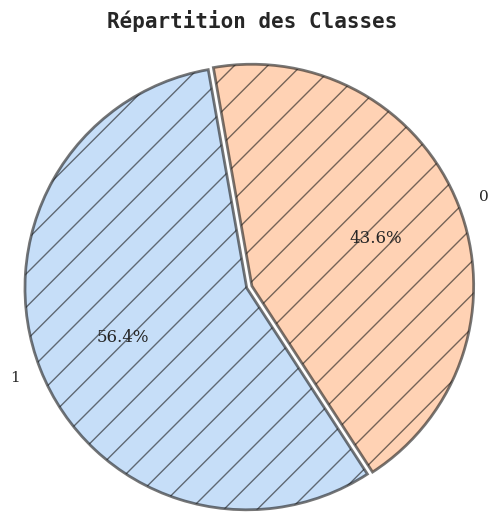

In [250]:
fig, ax = plt.subplots(figsize=(10,6))
sns.set_theme(palette="pastel",font ="serif")

df["Classes"].value_counts().plot.pie(
    autopct="%1.1f%%",
    # colors=["#E80137","#687559"],
    ylabel="",
    ax=ax ,
    # hue="Classes",
    wedgeprops={"edgecolor":"#1a1a1a", "linewidth":2 ,"hatch" :"/" , "alpha":0.6},
    explode = [0.03,0] ,
    startangle = 100 ,
    radius = 1.2
    # textprops = dict("")
    # labeldistance =
)
# ax.legend()
ax.set_title("Répartition des Classes",pad=20,family= "monospace",fontweight="bold",fontsize=15)
plt.show()


### Number features

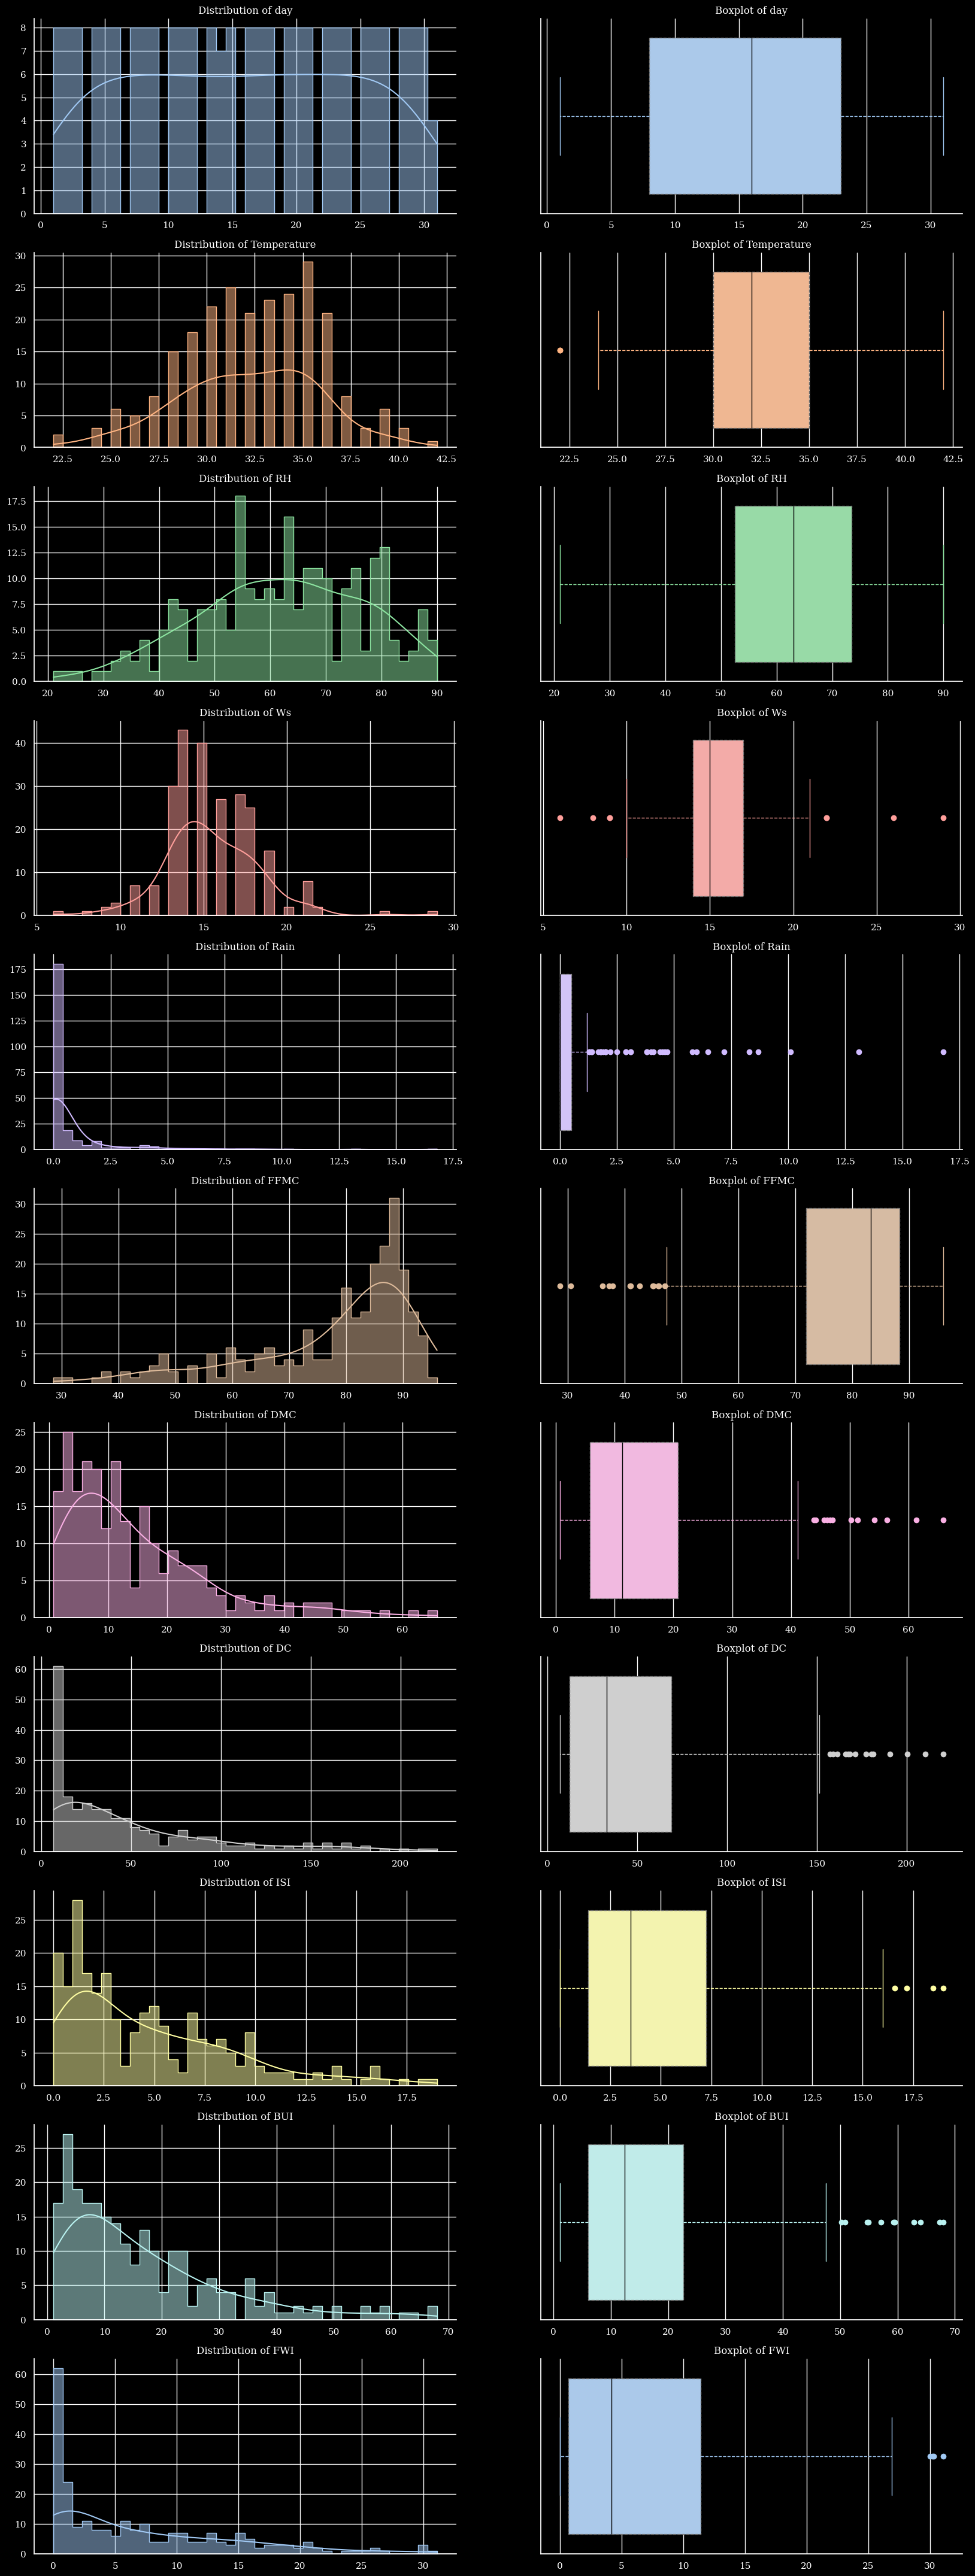

In [275]:
# df.columns
Num_var = df.dtypes[df.dtypes != "object"].index.drop(["region","month","Classes"])
n = len(Num_var)
fig , axes = plt.subplots(n,2,figsize=(20,5*n))

custom = {"axes.spines.right": False, "axes.spines.top": False}

sns.set_theme(palette="pastel",font ="serif",rc =custom,style="darkgrid")
plt.style.use("dark_background")


for i,col in enumerate(Num_var,1) :

  sns.histplot(
      data=df,
      x=col,
      bins=40,
      kde=True,
      color=sns.color_palette("pastel",n_colors= len(Num_var))[i-1],
      element="step",
      ax=axes[i-1,0]
      )

  axes[i-1,0].set_title(f"Distribution of {col}")
  axes[i-1,0].set_xlabel("")
  axes[i-1,0].set_ylabel("")

  sns.boxplot(
      data=df,
      x=col,
      ax=axes[i-1,1],
      color=sns.color_palette("pastel",n_colors= len(Num_var))[i-1],
      boxprops ={"ls":"--" },
      capprops = {"color":sns.color_palette("pastel",n_colors= len(Num_var))[i-1]},
      whiskerprops = {"color":sns.color_palette("pastel",n_colors= len(Num_var))[i-1],"ls":"--"},
      flierprops = {"marker":"o","markerfacecolor":sns.color_palette("pastel",n_colors= len(Num_var))[i-1],"markeredgecolor":sns.color_palette("pastel",n_colors= len(Num_var))[i-1]},
      medianprops = {"color":"black"}
      )

  axes[i-1,1].set_title(f"Boxplot of {col}")
  axes[i-1,1].set_xlabel("")
  axes[i-1,1].set_ylabel("")
plt.show()

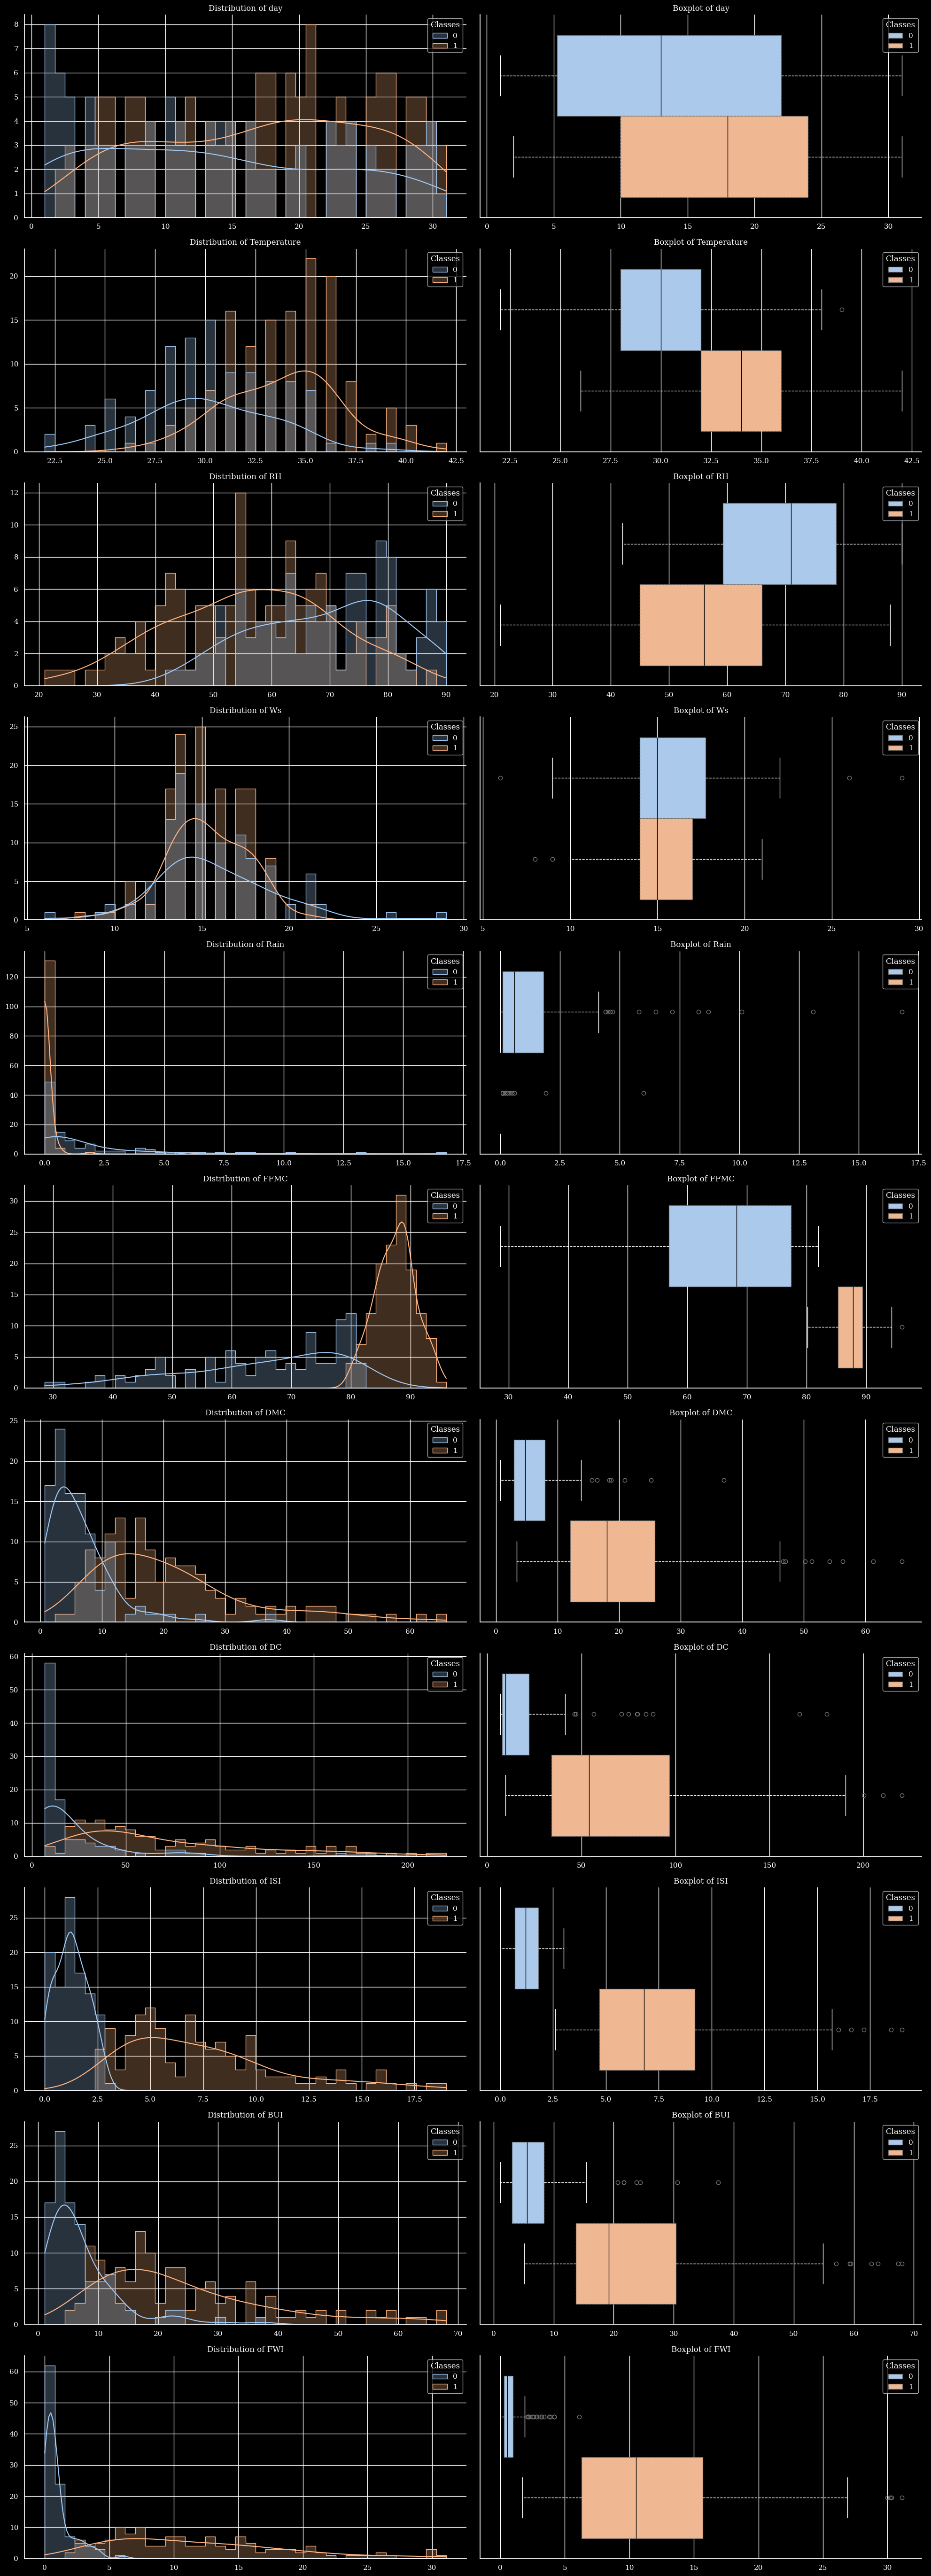

In [274]:
Num_var = df.dtypes[df.dtypes != "object"].index.drop(["region","month","Classes"])
n = len(Num_var)

fig, axes = plt.subplots(n, 2, figsize=(20, 5*n))
custom = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(palette="pastel", font="serif", rc=custom, style="darkgrid")
plt.style.use("dark_background")

# Palette pour les classes
classes = df["Classes"].unique()
palette_classes = sns.color_palette("pastel", n_colors=len(classes))

for i, col in enumerate(Num_var):
    # Histogram + KDE
    sns.histplot(
        data=df,
        x=col,
        bins=40,
        hue="Classes",
        kde=True,
        palette=palette_classes,
        element="step",
        ax=axes[i, 0] if n > 1 else axes[0]
    )
    axes[i, 0].set_title(f"Distribution of {col}")
    axes[i, 0].set_xlabel("")
    axes[i, 0].set_ylabel("")

    # Boxplot
    sns.boxplot(
    data=df,
    x=col,
    hue="Classes",
    palette=palette_classes,       # Seaborn gère la couleur des boxes
    boxprops={"ls": "--"},          # style de ligne de la box
    capprops={"color": "white"},    # couleur des caps
    whiskerprops={"color": "white", "ls": "--"},  # couleur des whiskers
    flierprops={"marker": "o"},     # style des outliers
    medianprops={"color": "black"}, # couleur de la médiane
    ax=axes[i, 1] if n > 1 else axes[1]
)

    axes[i, 1].set_title(f"Boxplot of {col}")
    axes[i, 1].set_xlabel("")
    axes[i, 1].set_ylabel("")

plt.tight_layout()
plt.show()


## Corrélation

In [238]:
df["Classes"]= np.where(df["Classes"]=="not fire",0,1).astype(int)
# df.drop("Classes1",axis=1,inplace=True)

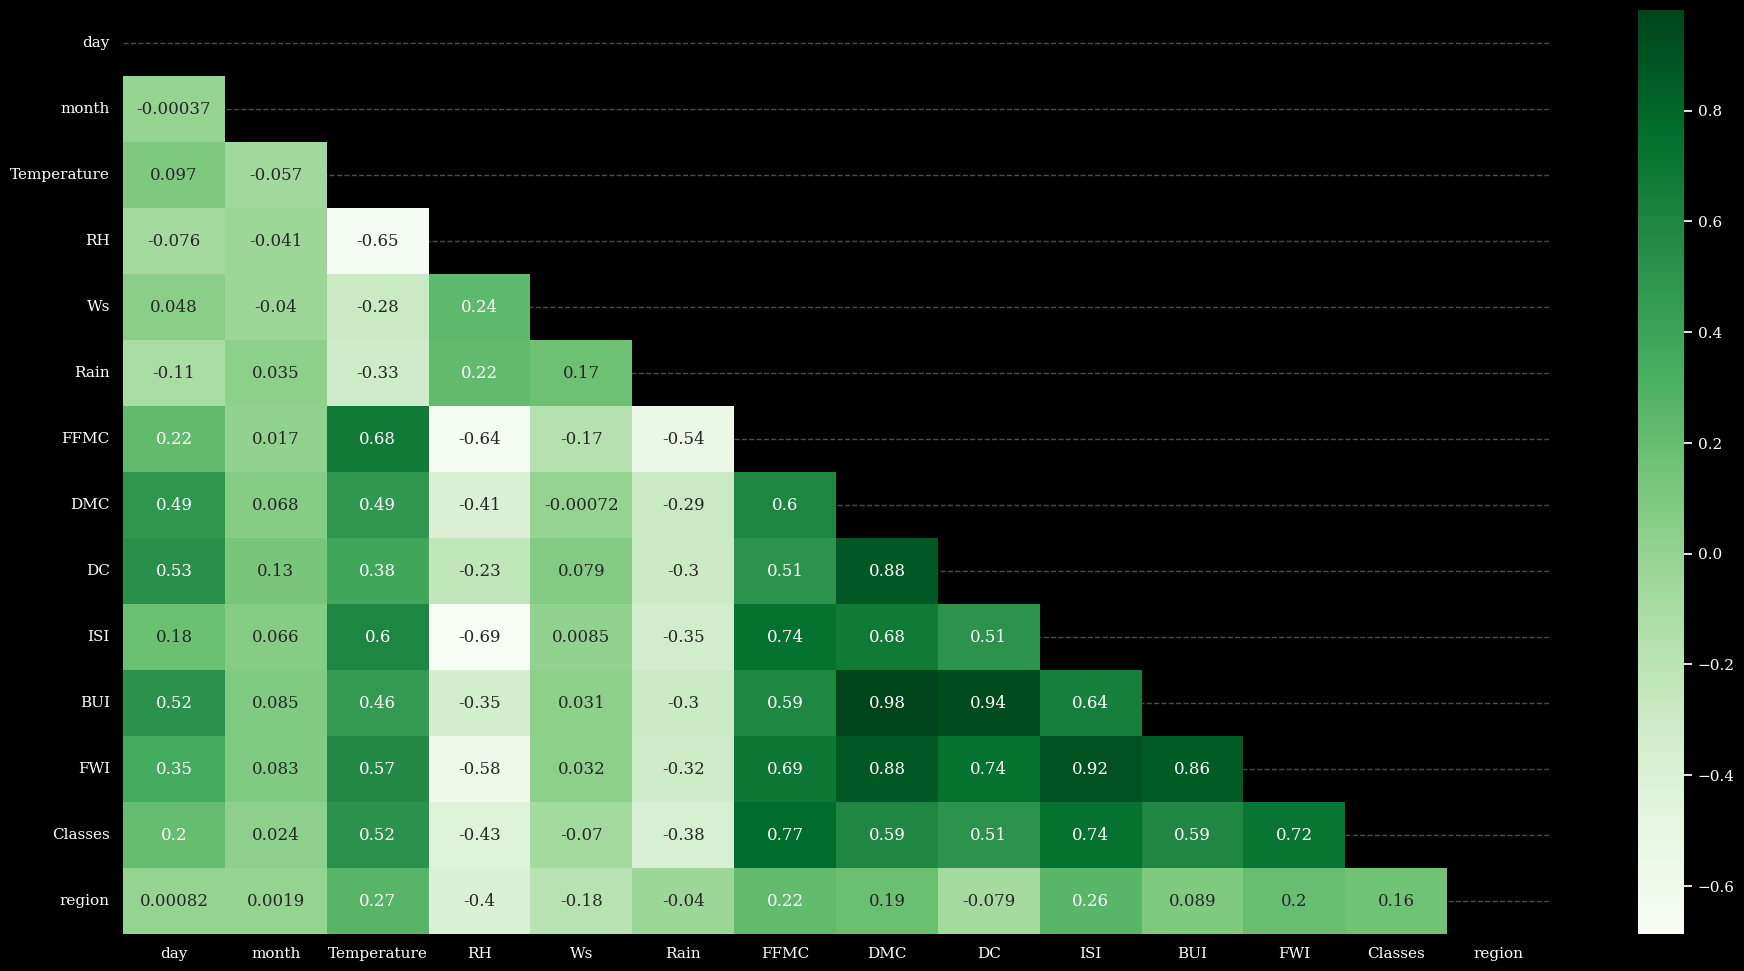

In [268]:
fig , axes = plt.subplots(figsize=(23,12))
mask = np.triu(df.corr())
sns.heatmap(
    df.corr(),
    annot=True,
    cmap="Greens",
    mask = mask
    # lw =1,
    # linecolor ="gray"
)
axes.yaxis.grid(ls="--" , alpha =0.3)
axes.xaxis.grid(False)
plt.show()

## Montlhy analysis

In [278]:
df["Classes"].value_counts()

,count
Classes,
1,137
0,106


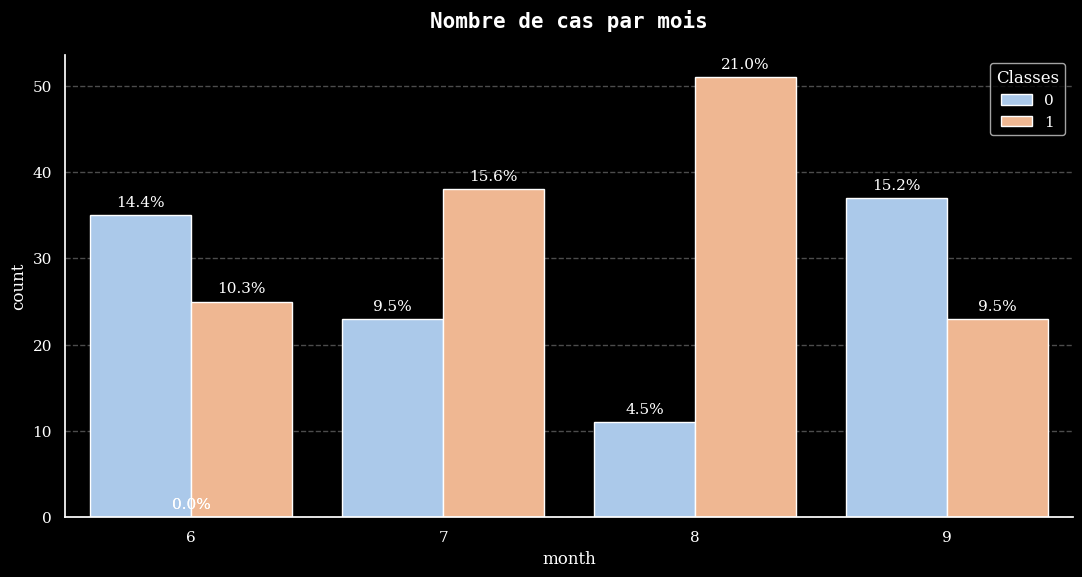

In [309]:
fig,axes = plt.subplots(figsize=(13,6))
sns.countplot(data=df,x="month",hue="Classes",palette = palette_classes)
axes.yaxis.grid(ls="--",alpha=0.3)
axes.set_title("Nombre de cas par mois",pad = 20,family="monospace",fontweight="bold",fontsize=15)
for p in axes.patches:
    value = p.get_height()
    total = len(df)  #
    axes.text(
        p.get_x() + p.get_width()/2,  # position x
        value + 1,                    # position y
        f"{value/total:.1%}",         # texte
        ha="center",                  # alignement horizontal
        fontsize=11,                  # taille du texte
        color="white"                 # couleur du texte si fond sombre
    )
plt.show()

# for p in ax.patches:
#     ax.annotate(f'{p.get_height()}',
#                 (p.get_x() + p.get_width() / 2., p.get_height()+1),
#                 ha ="center" , va ="bottom" , color ="white" ,fontsize =12 , fontweight ="regular" , fontfamily ="serif")

In [310]:
df.to_csv("Algerian_forest_fires_dataset_cleaned.csv",index=False)